# 1. Do PCA on Titanic Dataset.

In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('Datasets/titanic.csv')
df.head(2)

,survived,pclass,gender,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C


In [25]:
# Columns to retain

numerical_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [26]:
# Handle missing values for numerical columns

numerical_data = df[numerical_cols]
imputer_num = SimpleImputer(strategy = 'mean')
numerical_data = imputer_num.fit_transform(numerical_data)
numerical_df = pd.DataFrame(numerical_data, columns = numerical_cols)

In [27]:
# Standardize the data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_df)

In [28]:
# Apply PCA

pca = PCA(3)
X_pca = pca.fit_transform(data_scaled)

In [29]:
# Variance captured by each component

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

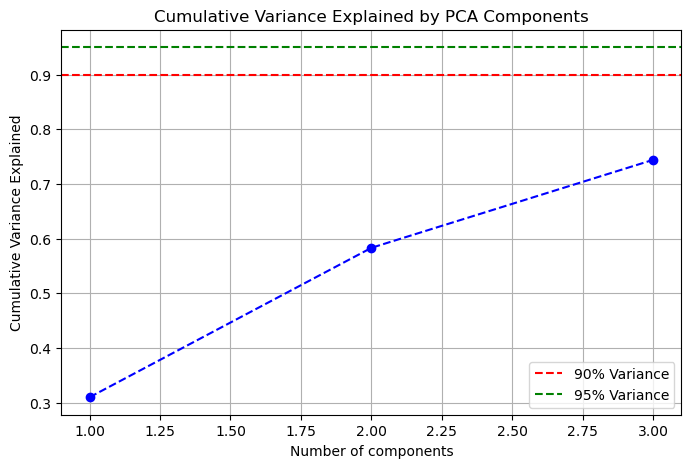

In [30]:
# Plot cumulative variance

plt.figure(figsize = (8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker = 'o', linestyle = '--', color = 'b')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y = 0.9, color = 'r', linestyle = '--', label = '90% Variance')
plt.axhline(y = 0.95, color = 'g', linestyle = '--', label = '95% Variance')
plt.legend()
plt.grid()
plt.show()

In [31]:
# Display results

print("Explained Variance Ratio (for each PC):")
print(explained_variance)

Explained Variance Ratio (for each PC):
[0.30992303 0.27319996 0.16095264]


In [32]:
print("\nCumulative Variance:")
print(cumulative_variance)


Cumulative Variance:
[0.30992303 0.58312299 0.74407563]


# 2. Create a decision tree on titanic dataset.

In [154]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [182]:
df = pd.read_csv('Datasets/titanic.csv')
df.head(2)

,survived,pclass,gender,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C


In [183]:
# Drop rows with missing values

df = df.dropna()
print(df.shape)
survived = df['survived'] # We will need this later

(182, 9)


In [184]:
# Columns to retain

no_encoding_scaling_needed_columns = ['survived', 'sibsp', 'parch']
numerical_cols = ['pclass', 'age', 'fare']
categorical_cols = ['gender', 'embarked', 'deck', 'pclass']

In [185]:
# No encoding needed columns

no_encoding_needed_df = df[no_encoding_scaling_needed_columns]

In [186]:
# Handle missing values for numerical columns

numerical_data = df[numerical_cols]
imputer_num = SimpleImputer(strategy = 'mean')
numerical_data = imputer_num.fit_transform(numerical_data)
numerical_df = pd.DataFrame(numerical_data, columns = numerical_cols)

In [187]:
# Encode categorical columns

categorical_data = df[categorical_cols]
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
categorical_data = encoder.fit_transform(categorical_data)
categorical_df = pd.DataFrame(categorical_data, columns = encoder.get_feature_names_out(categorical_cols))

In [188]:
# Combine numerical and categorical data using pd.concat

combined_data = pd.concat([no_encoding_needed_df, numerical_df, categorical_df], axis = 1)
pd.set_option('display.max_columns', None)
print(combined_data.head())
pd.reset_option("display.max_columns")

    survived  sibsp  parch  pclass   age    fare  gender_female  gender_male  \
1        1.0    1.0    0.0     1.0  35.0  53.100            1.0          0.0   
3        1.0    1.0    0.0     3.0   4.0  16.700            1.0          0.0   
6        0.0    0.0    0.0     1.0  28.0  35.500            0.0          1.0   
10       1.0    1.0    1.0     1.0  45.0  83.475            0.0          1.0   
11       1.0    0.0    0.0     2.0  29.0  10.500            1.0          0.0   

    embarked_C  embarked_Q  embarked_S  deck_A  deck_B  deck_C  deck_D  \
1          0.0         0.0         1.0     0.0     0.0     1.0     0.0   
3          0.0         0.0         1.0     0.0     0.0     0.0     0.0   
6          0.0         0.0         1.0     1.0     0.0     0.0     0.0   
10         0.0         0.0         1.0     0.0     0.0     1.0     0.0   
11         0.0         0.0         1.0     0.0     0.0     0.0     0.0   

    deck_E  deck_F  deck_G  pclass_1  pclass_2  pclass_3  
1      0.0     

In [189]:
# Standardize the data

scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data)

In [190]:
# Standard Scalar outputs a numpy array, so we need to convert it into a DF

df = pd.DataFrame(combined_data_scaled, columns = combined_data.columns, index = combined_data.index)
print(df.shape)

(334, 21)


In [192]:
df = df.reset_index(drop=True)
survived = survived.reset_index(drop=True)

In [191]:
# Separate features and target

# X = df.copy()
X = df.drop(columns=["survived"]).copy()
y = survived.copy()

In [193]:
print(X.shape, y.shape)

(334, 20) (182,)


In [194]:
print(survived.shape)

(182,)


In [195]:
df.shape[0]

334

In [196]:
print(y.isna().sum())  # Counts missing values

0


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

ValueError: Found input variables with inconsistent numbers of samples: [334, 182]

In [126]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

ValueError: Input y contains NaN.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Combine predicted and actual values for comparison

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPredicted vs Actual values:")
print(comparison_df.head(20)) # Display the first 20 comparisons

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Save the tree as a DOT file

with open("titanic_tree.dot", "w") as f:
    export_graphviz(model, out_file = f, feature_names = combined_data.columns, filled = True)

# Google 'dot file editor' and upload this file to see the decision tree

# 3. Do PCA on the diabetes dataset and implement the components to create a decision tree.

In [51]:
# 4. Find a dataset from Kaggle to perform bootstrapping and k-fold cross validation.
# (a) First build a Logistic Regression Model to predict without using bootstrapping or k-fold cross validation. Find the accuracy socre.
# (b) Repeat with bootstrapping.
# (c) Repeat with k-fold cross validation.

In [60]:
# (a) First build a Logistic Regression Model to predict without using bootstrapping or k-fold cross validation. Find the accuracy socre.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [61]:
df = pd.read_csv('C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/credit_dataset.csv')

In [62]:
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

In [64]:
# Split the dataset into predictor variables x and the target variable y
X = df.drop("TARGET", axis=1)
y = df['TARGET']

In [65]:
# Standardize only the 'Insulin' column
scaler = StandardScaler()
X['INCOME'] = scaler.fit_transform(X[['INCOME']])

In [66]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']])

# Convert back to DataFrame and merge with X_train
import pandas as pd
X_train = pd.concat([X.drop(columns=['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']), 
                     pd.DataFrame(X_encoded.toarray())], axis=1)

In [67]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['GENDER'] = label_encoder.fit_transform(X['GENDER'])  # 'M' -> 1, 'F' -> 0

In [68]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17593 entries, 21574 to 235
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      17593 non-null  int64  
 1   ID              17593 non-null  int64  
 2   GENDER          17593 non-null  int32  
 3   CAR             17593 non-null  object 
 4   REALITY         17593 non-null  object 
 5   NO_OF_CHILD     17593 non-null  int64  
 6   INCOME          17593 non-null  float64
 7   INCOME_TYPE     17593 non-null  object 
 8   EDUCATION_TYPE  17593 non-null  object 
 9   FAMILY_TYPE     17593 non-null  object 
 10  HOUSE_TYPE      17593 non-null  object 
 11  FLAG_MOBIL      17593 non-null  int64  
 12  WORK_PHONE      17593 non-null  int64  
 13  PHONE           17593 non-null  int64  
 14  E_MAIL          17593 non-null  int64  
 15  FAMILY SIZE     17593 non-null  float64
 16  BEGIN_MONTH     17593 non-null  int64  
 17  AGE             17593 non-null  in

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

In [70]:
# Create and train a logistic regresion model
# Options: liblinear: For small datasets, binary classification, can work without standardization
# lbfgs: Multiclass, medium-to-large datasets, newton-cg: similar
# sag: large datasets, needs standardization
classifier = LogisticRegression(solver = 'liblinear')
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'Y'

In [73]:
['hello', 'morning'][bool('')]

'hello'

In [ ]:
# 5. Find a dataset from Kaggle containing imbalanced labels.
# Use SMOTE to perform oversampling.
# Compare model accuracy before and after SMOTE.

In [ ]:
Practice Question

6. Combine datasets Men ODI 